In [2]:
!pip install tensorflow_text
!pip install tensorflow
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 22.1 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Fou

In [3]:
!pip install sentencepiece

In [4]:
import zipfile
import io
import numpy as np
import pandas as pd
import re
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
import transformers
from transformers import AutoModel, BertTokenizerFast
import matplotlib.pyplot as plt
import re
from transformers import BertForSequenceClassification
import random
from tqdm.notebook import tqdm
import seaborn as sns
import time
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from sklearn.utils import resample
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional, Dropout, GlobalAveragePooling1D, BatchNormalization, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
import pandas as pd
from transformers import CTRLTokenizer, CTRLLMHeadModel, CTRLConfig
from transformers import TextDataset, DataCollatorForLanguageModeling
from transformers import Trainer, TrainingArguments

# from nltk.corpus import stopwords
# import nltk

In [5]:
with zipfile.ZipFile('/content/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('emotions')

In [6]:
df = pd.read_csv("/content/emotions/Emotion_final.csv")
df.sample(10)

,Text,Emotion
8188,ive stamped out old relationships feeling like...,love
13005,i didn t really feel awkward at all,sadness
11289,i dont have much art online that i feel proper...,sadness
17512,i am really excited because i didnt really sta...,happy
10636,im feeling rather mellow id like to point out ...,happy
6864,i tried to explain to him how i feel when he s...,love
10349,i am energetically pursuing my goals or i feel...,anger
15799,i also mention marriage living in that he also...,anger
5044,i just feel resentful and show my resentment b...,anger
13339,i most want to do better think harder feel mor...,love


In [7]:
df["Emotion"].nunique()

6

In [8]:
df["Emotion"].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy'],
      dtype=object)

In [9]:
df["Emotion"]

0        sadness
1        sadness
2          anger
3           love
4          anger
          ...   
21454       fear
21455       fear
21456       fear
21457       fear
21458       fear
Name: Emotion, Length: 21459, dtype: object

<Axes: xlabel='Emotion', ylabel='count'>

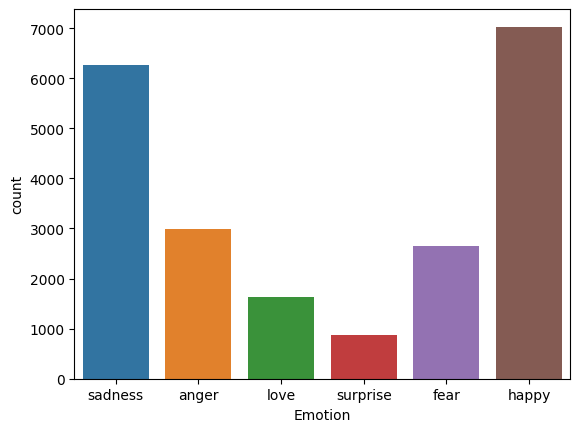

In [10]:
sns.countplot(x = "Emotion", data = df)

In [11]:
df['Text'] = df['Text'].str.lower()
df['Text']

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
21454                 melissa stared at her friend in dism
21455    successive state elections have seen the gover...
21456                 vincent was irritated but not dismay
21457    kendall-hume turned back to face the dismayed ...
21458                      i am dismayed , but not surpris
Name: Text, Length: 21459, dtype: object

In [12]:
emoj = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002500-\U00002BEF"  # chinese char
    u"\U00002702-\U000027B0"
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    u"\U0001f926-\U0001f937"
    u"\U00010000-\U0010ffff"
    u"\u2640-\u2642"
    u"\u2600-\u2B55"
    u"\u200d"
    u"\u23cf"
    u"\u23e9"
    u"\u231a"
    u"\ufe0f"  # dingbats
    u"\u3030"
    u"\u2028"
    "\x08"
    u"\u200a"
    u"\u200b"
                  "]+", re.UNICODE)

In [13]:
from nltk.tokenize import WhitespaceTokenizer
tk = WhitespaceTokenizer()
df['Text'] = df['Text'].astype(str)
df['Text'] = df['Text'].apply(lambda x: tk.tokenize(x))
df['Text']

0                             [i, didnt, feel, humiliated]
1        [i, can, go, from, feeling, so, hopeless, to, ...
2        [im, grabbing, a, minute, to, post, i, feel, g...
3        [i, am, ever, feeling, nostalgic, about, the, ...
4                                [i, am, feeling, grouchy]
                               ...                        
21454         [melissa, stared, at, her, friend, in, dism]
21455    [successive, state, elections, have, seen, the...
21456          [vincent, was, irritated, but, not, dismay]
21457    [kendall-hume, turned, back, to, face, the, di...
21458              [i, am, dismayed, ,, but, not, surpris]
Name: Text, Length: 21459, dtype: object

In [14]:
df['Text'] = df['Text'].astype(str)
df['Text'] = df['Text'].apply(lambda x: re.sub(r"[^a-zA-Z0-9]", " ", x))

In [15]:
# Define the function to apply the code to each row
def clean_text(text):
    cleaned_text = re.sub(':' , " " , re.sub(';' , ' ' , re.sub('&nbsp' , "" ,
       (re.sub(r'http\S+', ' ',
               (re.compile(r'<.*?>').sub("" ,text)))))))
    cleaned_text = emoj.sub("", cleaned_text)
    return cleaned_text

# Convert the 'text' column to string type
df["Text"] = df["Text"].astype(str)

# Apply the function to each row of 'text'
df["Text"] = df["Text"].apply(clean_text)

In [16]:
# upsample surprise
n_surp_sample = 1000
surp = df[df["Emotion"] == "surprise"]
surp_upsample = resample(surp, random_state = 35, n_samples=n_surp_sample, replace = True)

# upsample love
n_love_sample = 500
love = df[df["Emotion"] == "love"]
love_upsample = resample(love, random_state = 35, n_samples=n_love_sample, replace = True)

df = pd.concat([df, surp_upsample, love_upsample])

<Axes: xlabel='Emotion', ylabel='count'>

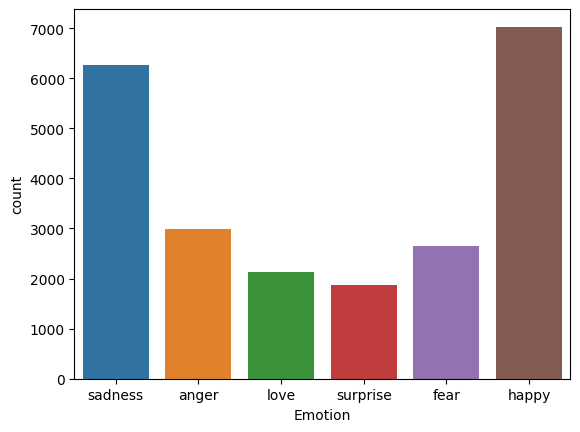

In [17]:
sns.countplot(x = "Emotion", data = df)

In [18]:
encoder = OneHotEncoder()
X = np.array(df.Text)
y = encoder.fit_transform(np.array(df.Emotion).reshape(-1,1)).toarray()

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train)

In [20]:
tokenize_data = Tokenizer(oov_token='<UNK>', split=" ")
tokenize_data.fit_on_texts(X)

In [21]:
tokenize_train = tokenize_data.texts_to_sequences(X_train)
vec_train = pad_sequences(tokenize_train, padding="post", maxlen=50)

tokenize_val = tokenize_data.texts_to_sequences(X_val)
vec_val = pad_sequences(tokenize_val, padding="post", maxlen=50)

tokenize_test = tokenize_data.texts_to_sequences(X_test)
vec_test = pad_sequences(tokenize_test, padding="post", maxlen=50)

vocab_size = len(tokenize_data.word_index) + 1

In [22]:
# y_train.nunique()

In [23]:
# model = Sequential()
# model.add(Embedding(input_dim=vocab_size, output_dim=256, input_len=50))
# model.add(Bidirectional(LSTM(unit)))

In [24]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=50))
model.add(Bidirectional(LSTM(units=128, dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(units=128, dropout=0.2, return_sequences=True)))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(units=512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(units=512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(units=6, activation='softmax'))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 128)           2463232   
                                                                 
 bidirectional (Bidirection  (None, 50, 256)           263168    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 50, 256)           394240    
 onal)                                                           
                                                                 
 global_max_pooling1d (Glob  (None, 256)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 256)               65792     
                                                        

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("/content/model.pth", monitor='val_accuracy', verbose=0, save_best_only=True, mode='auto')
t = time.time()
his = model.fit(x=vec_train, y=y_train, batch_size=128, epochs=30, validation_data=(vec_val, y_val), callbacks = [checkpoint])
print(f'Time taken: {time.time() - t}')

Epoch 1/30
146/146 [==============================] - 234s 1s/step - loss: 0.0321 - accuracy: 0.9887 - val_loss: 0.9838 - val_accuracy: 0.8089
Epoch 2/30
 20/146 [===>..........................] - ETA: 2:07 - loss: 0.0192 - accuracy: 0.9937

In [26]:
# evaluation
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
class_names = ["anger", "fear", "happy", "love", "sadness", "surprise"]

def model_Evaluate(model, X_test, y_test):

    t = time.time()
    y_pred = model.predict(X_test)
    t = time.time() - t
    y_pred = y_pred.argmax(axis=-1)
    y_test = y_test.argmax(axis=-1)

    print(f'Prediction time: {t/len(y_pred)}')
    print(classification_report(y_test, y_pred))

    for title, normalize in titles_options:
      disp = ConfusionMatrixDisplay.from_predictions(
          y_test,
          y_pred,
          display_labels=class_names,
          cmap=plt.cm.Blues,
          normalize=normalize,
      )
      disp.ax_.set_title(title)
      plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
      plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)

In [27]:
model=tf.keras.models.load_model("/content/model.pth")

In [28]:
# model_Evaluate(model=model, X_test=vec_test, y_test=y_test)

In [29]:
import zipfile

# List of file paths to include in the zip
file_paths = ['/content/model.pth']

# Name of the zip file to create
zip_filename = 'senti-test.zip'

# Create a zip file
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for file in file_paths:
        zipf.write(file)

print(f'{zip_filename} created successfully!')

senti-test.zip created successfully!
